# Predicting NFL Win Totals

## BASELINE

## constraints
- years: 2009-present
- all 32 teams


## Model
- Random Forest

## Dependent Variable
- Current Year's Win Total

## Independent Variables
- [x]  Previous Year's Strength of Schedule
- [x] Current Year's Market-Priced Strength of Schedule
- [x] Previous Year's Relative Performance (EPA Standardized w.r.t Year)

In [3]:
# import python packages & libraries
import numpy as np
import pandas as pd
import nfl_data_py as nfl

In [33]:
# YEARS = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
YEARS_debug = [2019,2020,2021]

# Get Data
- Previous Year's Strength of Schedule
    - Each opposing team's previous year's Win PCT
        - Obtain schedule for the `result` for `game_type` REG season (ref: data_dict https://github.com/nflverse/nflreadr/blob/main/data-raw/dictionary_schedules.csv)
        - Transform schedule result to win/loss
        - Group Year & Team to obtain sum of wins / count games played
- Current Year's Market-Priced Strength of Schedule
    - Each opposing team's expected Win PCT
- Previous Year's Relative Performance
    - Team's EPA standardized w.r.t Year's mean team EPA
    

## Previous Year's Relative Performance

In [34]:
# import the NFL schedule
nfl_pbp = nfl.import_pbp_data(years=YEARS_debug)

2019 done.
2020 done.
2021 done.
Downcasting floats.


In [35]:
# sum the offensive epa and the defensive epa of each team in each season
nfl_epa = (nfl_pbp.groupby(['posteam','season'])['epa'].sum() + nfl_pbp.groupby(['defteam','season'])['epa'].sum() * -1).reset_index().sort_values('epa')


In [36]:
nfl_epa['epa'] = (nfl_epa['epa'] - nfl_epa['epa'].mean()) / nfl_epa['epa'].std()

In [37]:
nfl_epa

,posteam,season,epa
73,NYJ,2020,-1.943731
44,JAX,2021,-1.931442
74,NYJ,2021,-1.878298
57,MIA,2019,-1.757208
43,JAX,2020,-1.711465
...,...,...,...
63,NE,2019,1.718446
88,TB,2020,1.721600
84,SF,2019,1.775135
11,BUF,2021,2.005344


<AxesSubplot:ylabel='Density'>

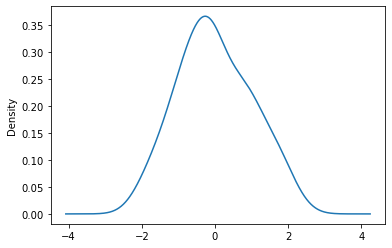

In [31]:
nfl_epa['epa'].plot.kde()